### 3.11 模型选择、欠拟合和过拟合

### 3.11.4 多项式函数拟合实验

In [28]:
import torch
import numpy as np
import sys
import os, sys
sys.path.append("..")
import d2lzh_pytorch.utils as d2l
np.random.seed(666)
cur_path = os.path.abspath(os.path.dirname('__file__'))
data_path = cur_path.replace('dl\dive-into-dl\chapter03-dl-basics', 'data\\')
np.random.seed(666)
torch.manual_seed(666)

### 3.11.4.1 生成数据集

$$y = 1.2x - 3.4x^2 + 5.6x^3 + 5 + \varepsilon$$

In [29]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
# x ** 2 + x ** 3 + 1
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
# 此时labels就是公式中的y
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] 
          + true_w[2] * poly_features[:, 2] + true_b)
# 加入noise
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [30]:
features[:2], poly_features[:2], labels[:2]

(tensor([[-0.7747],
         [ 0.7926]]), tensor([[-0.7747,  0.6002, -0.4650],
         [ 0.7926,  0.6282,  0.4980]]), tensor([-0.5661,  6.6085]))

### 3.11.4.2 定义、训练和测试模型

In [33]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, 
              y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [37]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    # pytorch中已经将Linear初始化
    net = torch.nn.Linear(train_features.shape[-1], 1)
    
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs+1), train_ls, 'epochs', 'loss', range(1, num_epochs+1), test_ls, ['train', 'test'])
    print('weight', net.weight.data, '\nbias', net.bias.data)

### 3.11.4.3 三阶多项式函数拟合

final epoch: train loss 0.00880697462707758 test loss 0.14995457231998444
weight tensor([[ 1.3870, -3.2880,  5.5023]]) 
bias tensor([4.9354])


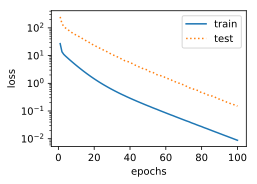

In [38]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

### 3.11.4.4 线性函数拟合(欠拟合)

final epoch: train loss 26.610502243041992 test loss 401.5584411621094
weight tensor([[10.7544]]) 
bias tensor([3.9016])


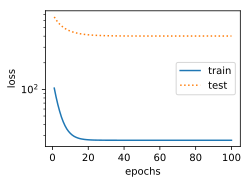

In [39]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[: n_train], labels[n_train:])

### 3.11.4.5 训练样本不足(过拟合)

final epoch: train loss 0.5019018650054932 test loss 314.0302734375
weight tensor([[2.5113, 1.2379, 1.9215]]) 
bias tensor([1.9971])


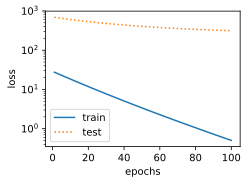

In [41]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])